# Python Advanced

## Immutability and Hashing

* [SO discussion](https://stackoverflow.com/questions/2671376/hashable-immutable)
    * immutable object 初始化之後就不能改變了，mutable 的可以
    * mutable object 例如 list 預設不能 hash。可以自己寫 ```__hash__```，如果 list 的內容被改變了 hash 也要跟著變
* primitive types 之中 mutable 的只有 ```dict```，```list``` 跟 ```set```。下面這個表來自 [medium post](https://medium.com/@meghamohan/mutable-and-immutable-side-of-python-c2145cf72747)

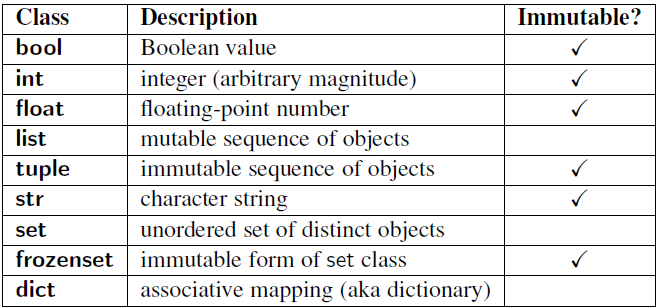

## ```if __name__ == "__main__":```

* 當一個 script 被當作 entry point 執行時 ```__name__``` 會被設成 ```"__main__"```
* 如果是被當作 module include，```__name__``` 會被設成該 script 的檔名

## Context Manager (the ```with``` Statement)

* [SO discussion](https://stackoverflow.com/questions/1984325/explaining-pythons-enter-and-exit)
* The following are equivalent
    * ```try``` block
    ```
    set things up
    try: 
        do something
    finally:
        tear things down
    ```
    * ```with``` statement
    ```
    class controlled_execution:
        def __enter__(self):
            set things up
            return thing
        def __exit__(self, exc_type, exc_value, traceback):
            tear things down        
    ```
    ```
    with controlled_execution as thing:
        some code
    ```
* controlled_execution is a context manager class which implements ```__enter__()``` and ```__exit__()```. The return value of ```__enter__()```, if provided, is assigned to the variable followed by ```as```

In [10]:
import numpy as np

class fix_seed:
    def __init__(self, seed=0):
        self.seed = seed
        
    def __enter__(self):
        np.random.seed(self.seed)
    
    def __exit__(self, exc_type=None, exc_value=None, traceback=None):
        np.random.seed()
        
with fix_seed(seed=0):
    print(np.random.uniform())
print(np.random.uniform())

0.5488135039273248
0.9087389795050141


## itertools.groupby

* 在把 data 丟進 groupby 裡之前必需是已經 sorted by key
* key 的用法和 sorted 一模一樣
* 迴圈裡的每一個 g 都是 iterator

In [6]:
import itertools

data = 'trust but verify by unittest'
keyfunc = None

groups = []
uniquekeys = []
data = sorted(data, key=keyfunc)
for k, g in itertools.groupby(data, keyfunc):
    groups.append(list(g))      # Store group iterator as a list
    uniquekeys.append(k)

from pprint import pprint
print('keys: ', uniquekeys)
print('groups: ')
pprint(groups)

keys:  [' ', 'b', 'e', 'f', 'i', 'n', 'r', 's', 't', 'u', 'v', 'y']
groups: 
[[' ', ' ', ' ', ' '],
 ['b', 'b'],
 ['e', 'e'],
 ['f'],
 ['i', 'i'],
 ['n'],
 ['r', 'r'],
 ['s', 's'],
 ['t', 't', 't', 't', 't', 't'],
 ['u', 'u', 'u'],
 ['v'],
 ['y', 'y']]


## collections

### Counter

* Dictionary of element frequencies of a list

In [4]:
import collections

collections.Counter('aaabbccccddeffffg')

Counter({'a': 3, 'b': 2, 'c': 4, 'd': 2, 'e': 1, 'f': 4, 'g': 1})

### deque

* 用 doubly linked list 寫成，左右兩端插入刪除都是 O(1)
* 也有 [circular array implementation](https://youtu.be/IITnvmnfi_Y?t=236)
    * 用兩個 index 指向兩端，因為是 circular array 所以沒有 index out of range 的問題
    * 如果 push 到空間不夠就 resize，向系統要更多空間重抄一次（takes $O(n)$ operations）重抄的時候用 0 當 start index
    

In [3]:
import collections

collections.deque([1, 2, 3])

deque([1, 2, 3])

## Functional Programming

* Pure function on immutable data
    * 如果用 mutable 到 multithread 的時候就要擔心同步問題
    * 不要用 list of dictionaries，用 tuple of collections.namedtuple，完全 immutable
* Pure function：每次執行結果都一樣，no access to global states，也不能改變 input（即使是 mutable）
* Higher Order Functions
    * ```filter(function, iterable)```
    * ```map(function, iterable, ...)```
    * ```functools.partial(func, /, *args, **keywords)```
    * ```functools.reduce(function, iterable[, initializer])```
* helper functions
    * ```zip(*iterables)```
    * any, all
    * enumerate
    * sort
    * [itertools](https://docs.python.org/3/library/itertools.html)：一些常用的 iterator
* 其實用 list comprehension 就可以取代 filter 和 map 了

## Exception

* [Corey Schafer tutorial](https://www.youtube.com/watch?v=NIWwJbo-9_8)

In [ ]:
try: 
    pass
except ValueError as error:  # 如果抓到 ValueError 就跑這裡
    pass
except TypeError as error:   # 如果抓到 TypeError 就跑這裡
    pass
except Exception as error:   # 任何其它 Exception 跑這裡。越 general 的要放越下面
    pass
else:                        # 完全沒抓到 Exception 就跑這裡
    pass
finally:                     # 不管有沒有 Exception 都會跑到這裡
    pass

In [7]:
try:
    f = open('circles_.py')
except FileNotFoundError as e:
    print(e)
else:
    print(f.readline())
    f.close()
finally:
    print('Done!')

[Errno 2] No such file or directory: 'circles_.py'
Done!


## unittest
* [Socratica video](https://www.youtube.com/watch?v=1Lfv5tUGsn8) 8 分鐘極簡版
* [Corey Schafer 40 min](https://www.youtube.com/watch?v=6tNS--WetLI)
* unittest test case methods 名稱一定要以 test 開頭，但 module 名稱不限
* 跑 unittest：可以指定 module 也可以不指定（```m``` 是當作 module 來跑）
    * ```python -m unittest test_circles.py```
    * ```python -m unittest test_circles```
    * ```python -m unittest```
* 不指定時 python 用 test discovery 抓所有名稱以 test 開頭的 test case method 來跑
* 如果在 test_circles.py 裡加這個就可以直接 ```python test_circles.py```
    ```
    if __name__ == '__main__':
        unittest.main()
    ```
* ```misc/pycircle``` 裡有 minimum python module with unittests，可以在 misc/ 下跑 ```python -m unittest```
* 每次 library 在使用中出錯時，修好後應該去對應的地方加一個相關的 test 保證以後不再出現同樣的錯
* ```setUp``` 和 ```tearDown```
    * ```setUp``` 在每一次 test case method 開始前先執行
    * ```tearDown``` 在每一次 test case method 結束後執行
    * ```setUpClass``` 在所有 test case method 開始前先執行一次
    * ```tearDownClass``` 在所有 test case method 結束前執行一次
* 所有 test case method 不一定會照順序執行，所以他們之前一定要獨立
* [unittest.mock.patch](https://youtu.be/6tNS--WetLI?t=1723) 沒看

In [10]:
# circles.py

from math import pi

def circle_area(r):
    if type(r) not in [int, float]:
        raise TypeError("The radius must be a non-negative real number.")
    
    if r < 0:
        raise ValueError("The radius cannot be negative")
    
    return pi*(r**2)

In [3]:
# test_circles.py

import unittest
from circles import circle_area
from math import pi

class TestCircleArea(unittest.TestCase):
    @classmethod
    def selfUpClass(cls):
        pass
    
    @classmethod
    def tearDownClass(cls):
        pass
    
    def selfUp(self):
        pass
    
    def tearDown(self):
        pass
    
    def test_area(self):
        # Test areas when radius >= 0
        self.assertAlmostEqual(circle_area(1), pi)
        self.assertAlmostEqual(circle_area(0), 0)
        self.assertAlmostEqual(circle_area(2.1), pi*(2.1**2))
        
    def test_values(self):
        # Make sure value erros are raised when necessary
        self.assertRaises(ValueError, circle_area, -2)      # 寫法一
        with self.assertRaises(ValueError):                 # 寫法二，可以正常呼叫函數
            circle_area(-2)
        
    def test_types(self):
        # Make sure type errors are raised when necessary
        self.assertRaises(TypeError, circle_area, 3+5j)
        self.assertRaises(TypeError, circle_area, True)
        self.assertRaises(TypeError, circle_area, "radius")

In [14]:
# this works because the scripts are here

!python -m unittest test_circles
!python -m unittest

...
----------------------------------------------------------------------
Ran 3 tests in 0.000s

OK
...
----------------------------------------------------------------------
Ran 3 tests in 0.000s

OK


## PEP8 Naming Styles

* [RealPython tutorial](https://realpython.com/python-pep8/)

| Type | Style |
|---|---|
| MyClass | PascalCase |
| MY_CONST | CAPITAL_SNAKE_CASE | 
| mypackage | likethis |
| everything_else | snake_case |

## OOP

* [Corey Schafer Video on OOP](https://www.youtube.com/watch?v=bD05uGo_sVI)

### Sample Program

* From [Corey Schafer Video on Preparing for Python Interview](https://youtu.be/DEwgZNC-KyE?t=899)
* 重覆默寫這段 code 直到覺得自然為止

In [5]:
class Person:
    def __init__(self, name):
        self.name = name
    
    def reveal_identity(self):
        print(f"My name is {self.name}.")
        
class SuperHero(Person):
    def __init__(self, name, hero_name):
        super().__init__(name)
        self.hero_name = hero_name
        
    def reveal_identity(self):
        super().reveal_identity()
        print(f"And I'm {self.hero_name}.")
        
corey = Person('Corey')
corey.reveal_identity()

wade = SuperHero('Wade Wilson', 'Deadpool')
wade.reveal_identity()

My name is Corey.
My name is Wade Wilson.
And I'm Deadpool.


### classmethod and staticmethod

* staticmethods don't have access to anything. A good use is to [group util functions](https://stackoverflow.com/questions/2438473/what-is-the-advantage-of-using-static-methods-in-python)

In [5]:
class Employee:

    num_of_emps = 0
    raise_amt = 1.04

    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.email = first + '.' + last + '@email.com'
        self.pay = pay

        Employee.num_of_emps += 1

    def fullname(self):
        return '{} {}'.format(self.first, self.last)

    def apply_raise(self):
        self.pay = int(self.pay * self.raise_amt)

    @classmethod
    def set_raise_amt(cls, amount):
        cls.raise_amt = amount

    @classmethod
    def from_string(cls, emp_str):
        first, last, pay = emp_str.split('-')
        return cls(first, last, pay)

    @staticmethod
    def is_workday(day):
        if day.weekday() == 5 or day.weekday() == 6:
            return False
        return True


emp_1 = Employee('Corey', 'Schafer', 50000)
emp_2 = Employee('Test', 'Employee', 60000)

Employee.set_raise_amt(1.05)

print(Employee.raise_amt)
print(emp_1.raise_amt)
print(emp_2.raise_amt)

emp_str_1 = 'John-Doe-70000'
emp_str_2 = 'Steve-Smith-30000'
emp_str_3 = 'Jane-Doe-90000'

first, last, pay = emp_str_1.split('-')

#new_emp_1 = Employee(first, last, pay)
new_emp_1 = Employee.from_string(emp_str_1)

print(new_emp_1.email)
print(new_emp_1.pay)

import datetime
my_date = datetime.date(2016, 7, 11)

print(Employee.is_workday(my_date))

1.05
1.05
1.05
John.Doe@email.com
70000
True


### Inheritance

In [6]:
class Employee:

    raise_amt = 1.04

    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.email = first + '.' + last + '@email.com'
        self.pay = pay

    def fullname(self):
        return '{} {}'.format(self.first, self.last)

    def apply_raise(self):
        self.pay = int(self.pay * self.raise_amt)


class Developer(Employee):
    raise_amt = 1.10

    def __init__(self, first, last, pay, prog_lang):
        super().__init__(first, last, pay)
        self.prog_lang = prog_lang


class Manager(Employee):

    def __init__(self, first, last, pay, employees=None):
        super().__init__(first, last, pay)
        if employees is None:
            self.employees = []
        else:
            self.employees = employees

    def add_emp(self, emp):
        if emp not in self.employees:
            self.employees.append(emp)

    def remove_emp(self, emp):
        if emp in self.employees:
            self.employees.remove(emp)

    def print_emps(self):
        for emp in self.employees:
            print('-->', emp.fullname())


dev_1 = Developer('Corey', 'Schafer', 50000, 'Python')
dev_2 = Developer('Test', 'Employee', 60000, 'Java')

mgr_1 = Manager('Sue', 'Smith', 90000, [dev_1])

print(mgr_1.email)

mgr_1.add_emp(dev_2)
mgr_1.remove_emp(dev_2)

mgr_1.print_emps()

Sue.Smith@email.com
--> Corey Schafer


### Special Methods

In [7]:
class Employee:

    raise_amt = 1.04

    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.email = first + '.' + last + '@email.com'
        self.pay = pay

    def fullname(self):
        return '{} {}'.format(self.first, self.last)

    def apply_raise(self):
        self.pay = int(self.pay * self.raise_amt)

    def __repr__(self):
        return "Employee('{}', '{}', {})".format(self.first, self.last, self.pay)

    def __str__(self):
        return '{} - {}'.format(self.fullname(), self.email)

    def __add__(self, other):
        return self.pay + other.pay

    def __len__(self):
        return len(self.fullname())


emp_1 = Employee('Corey', 'Schafer', 50000)
emp_2 = Employee('Test', 'Employee', 60000)

# print(emp_1 + emp_2)

print(len(emp_1))


13


### Property Decorators - Getters, Setters, and Deleters

In [8]:
class Employee:

    def __init__(self, first, last):
        self.first = first
        self.last = last

    @property
    def email(self):
        return '{}.{}@email.com'.format(self.first, self.last)

    @property
    def fullname(self):
        return '{} {}'.format(self.first, self.last)
    
    @fullname.setter
    def fullname(self, name):
        first, last = name.split(' ')
        self.first = first
        self.last = last
    
    @fullname.deleter
    def fullname(self):
        print('Delete Name!')
        self.first = None
        self.last = None


emp_1 = Employee('John', 'Smith')
emp_1.fullname = "Corey Schafer"

print(emp_1.first)
print(emp_1.email)
print(emp_1.fullname)

del emp_1.fullname

Corey
Corey.Schafer@email.com
Corey Schafer
Delete Name!


## Generator

* [Difference between iterators and generators](https://stackoverflow.com/questions/2776829/difference-between-pythons-generators-and-iterators)
    * iterator is any object of a class that has ```__next__``` and ```__iter__``` methods (```___iter___``` returns self)
    * generator is a function that has ```yield```
    * iterator 是比較廣的概念（any generator is an iterator but not vice versa）generator 寫起來比較快，但 iterator 有 class 可以客製很多不同的行為
* ```x**2 for x in range(100) if x%2 == 1``` 是一個 generator expression

In [10]:
def pow2():
    n = 2
    while n < 1000:
        yield n
        n *= 2

print([i for i in pow2()])

a = pow2()

print(next(a))
print(next(a))
print(next(a))

[2, 4, 8, 16, 32, 64, 128, 256, 512]
2
4
8


## [Coroutine](https://www.youtube.com/watch?v=7AoANOGIDuM)

In [6]:
# 呼叫 next() 時會跑到 coro 裡的下一個 yield
# 然後可以用 send 把值傳進正在跑的函數裡，同時 send 也會 return yield 的結果

def coro():
    step = 0
    while True:
        received = yield step
        step += 1
        print(f'Received: {received}')

c = coro()
next(c)               # important! get to the first yield
print(c.send(100))

Received: 100
1


## Decorator 

* 寫的很好的 [RealPython tutorial](https://realpython.com/primer-on-python-decorators/#stateful-decorators)，整篇看完了但沒時間作筆記
* 被 decorate 過的函數呼叫 ```.__name__``` 或 ```.__doc__```（```help()```）的時候會叫到 wrapper 的，所以才需要用 ```@functools.wraps(func)``` 把 func 的 name 和 docstring 抄給 wrapper
* ```@debug``` 印下函數的 input/output，可以用寫 recursive 的時候 debug
* [classes as decorators](https://realpython.com/primer-on-python-decorators/#classes-as-decorators)，implement ```__init__``` 和 ```__call__```，可以存狀態，例如 lru_cache

### General Pattern (No Argument)

In [7]:
import functools

def decorator(func):
    @functools.wraps(func)
    def wrapper_decorator(*args, **kwargs):
        # Do something before
        value = func(*args, **kwargs)
        # Do something after
        return value
    return wrapper_decorator

### Decorator fix_seed

In [367]:
# fix_seed：固定 seed = 0 版本。離開函數 seed 會還原成 None

import numpy as np
import functools

def fix_seed(fnc):
    @functools.wraps(fnc)
    def wrapper_fix_seed(*args, **kargs):
        np.random.seed(0)
        res = fnc(*args, **kargs)
        np.random.seed()
        return res
    return wrapper_fix_seed

@fix_seed
def printRand():
    print(np.random.uniform())
    
printRand()
print(np.random.uniform())

0.5488135039273248
0.6161167995056092


In [377]:
# 接受 argument 版本，但變成一定要指定 seed

import numpy as np
import functools

def fix_seed(seed=0):
    def decorator_fix_seed(fnc):
        @functools.wraps(fnc)
        def wrapper_fix_seed(*args, **kargs):
            np.random.seed(seed)
            res = fnc(*args, **kargs)
            np.random.seed()
            return res
        return wrapper_fix_seed
    return decorator_fix_seed

@fix_seed(100)
def printRand():
    print(np.random.uniform())
    
printRand()
print(np.random.uniform())

0.5434049417909654
0.3289099673526439


In [6]:
# 可以指定也可以不指定。若不指定 seed 預設為 0。若要指定一定要寫 seed=

# 有指定 seed 的時候相當於 printRand = fix_seed(seed=0)(printRand)，所以 _func 是 None
# 不指定 seed 的時候則變成 printRand = fix_seed(printRand)          把 function 傳進去

import numpy as np
import functools

def fix_seed(_func=None, *, seed=0):
    def decorator_fix_seed(func):
        @functools.wraps(func)
        def wrapper_fix_seed(*args, **kwargs):
            np.random.seed(seed)
            res = func(*args, **kwargs)
            np.random.seed()
            return res
        return wrapper_fix_seed

    if _func:
        return decorator_fix_seed(_func)
    else:
        return decorator_fix_seed

    
# @fix_seed(0)   # TypeError: 'int' object is not callable
# @fix_seed(seed=0)
@fix_seed
def printRand():
    print(np.random.uniform())
    
printRand()
print(np.random.uniform())    

0.5488135039273248
0.13056825103667768
